<h1 align="center", style="color:green">Hire Predictor</h1>

In this project, I am providing data for different candidates applying for jobs. So on the basis of their profile, I predicted whether that profile should be selected for a job or not.
The attributes for any candidate are:
1. Percentage
2. Backlog
3. Internships
4. First Round Percentage
5. Communication Skills rating

Importing necessary libraries

Loading the Dataset. Understanding and summarising the data.

In [3]:
import numpy as np
import pandas as pd

df = pd.read_excel('HiredDataSet.xlsx')
print(df.info())
print('--------------------------------------------------------------------------------------')
print(df.describe())
print('--------------------------------------------------------------------------------------')
d = {'Yes':1,'No':0}
df['Hire?'] = df['Hire?'].map(d)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 9 columns):
Timestamp               375 non-null datetime64[ns]
Email Address           227 non-null object
Name                    375 non-null object
Percentage              375 non-null float64
Backlog                 375 non-null int64
Internship              375 non-null int64
First Round             375 non-null float64
Communication Skills    375 non-null float64
Hire?                   375 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 26.4+ KB
None
--------------------------------------------------------------------------------------
       Percentage     Backlog  Internship  First Round  Communication Skills
count  375.000000  375.000000  375.000000   375.000000            375.000000
mean    71.966453    1.949333    2.349333    72.561707             74.309547
std     13.287568    2.272856    1.903583    12.449252             13.586139
min     3

,Timestamp,Email Address,Name,Percentage,Backlog,Internship,First Round,Communication Skills,Hire?
0,2018-08-13 03:41:25.168,NaN,Ayushi Mittal,81.0,0,1,75.0,80.0,1
1,2018-08-13 03:59:13.162,NaN,nimit nayak,70.0,0,3,87.0,70.0,1
2,2018-08-13 03:59:49.226,NaN,kunal sharma,81.0,2,3,75.0,67.0,0
3,2018-08-13 04:00:26.744,NaN,kaustubh Pandey,56.0,3,3,42.0,76.0,0
4,2018-08-13 04:01:01.694,NaN,Pranay Midha,74.0,4,3,82.0,75.0,1


### Using some basic pandas functions

In [4]:
col_names = ['Percentage','Backlog','Internship','First Round','Communication Skills','Hire?']
data = df[col_names]
data.head()

,Percentage,Backlog,Internship,First Round,Communication Skills,Hire?
0,81.0,0,1,75.0,80.0,1
1,70.0,0,3,87.0,70.0,1
2,81.0,2,3,75.0,67.0,0
3,56.0,3,3,42.0,76.0,0
4,74.0,4,3,82.0,75.0,1


In [5]:
df[df['Communication Skills']<40]

,Timestamp,Email Address,Name,Percentage,Backlog,Internship,First Round,Communication Skills,Hire?
57,2018-08-13 08:29:42.972,bruce@rich.com,Wayne Bruce,87.00,0,6,80.0,10.0,0
62,2018-08-13 08:37:33.444,clark@kent.com,Clark Kent,61.00,4,0,44.0,20.0,0
183,2018-08-13 21:34:49.184,shaileshr97@gmail.com,Shailesh Rawat,69.99,0,1,50.0,30.0,0
204,2018-08-13 21:48:45.360,mayawati@hathi.com,Maya,45.00,8,2,67.0,10.0,0
208,2018-08-13 21:52:02.391,kejriwal@khaasi.com,Keju bhai,51.00,3,1,56.0,30.0,0
301,2018-08-14 10:25:10.977,NaN,Charlie,55.00,2,2,40.0,33.0,0
331,2018-08-14 11:03:50.297,NaN,Shakti Kapoor,30.00,8,0,20.0,35.0,0


In [6]:
X_columns = ['Percentage','Backlog','Internship','First Round','Communication Skills']
X = data[X_columns]
y = data['Hire?']

features = list(X.columns)

### Importing Scikit Learn and splitting the data into Test Data nd Train Data

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

## Decision Tree

In [9]:
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [10]:
model.score(X_test,y_test) # Getting the accuracy score

0.9333333333333333

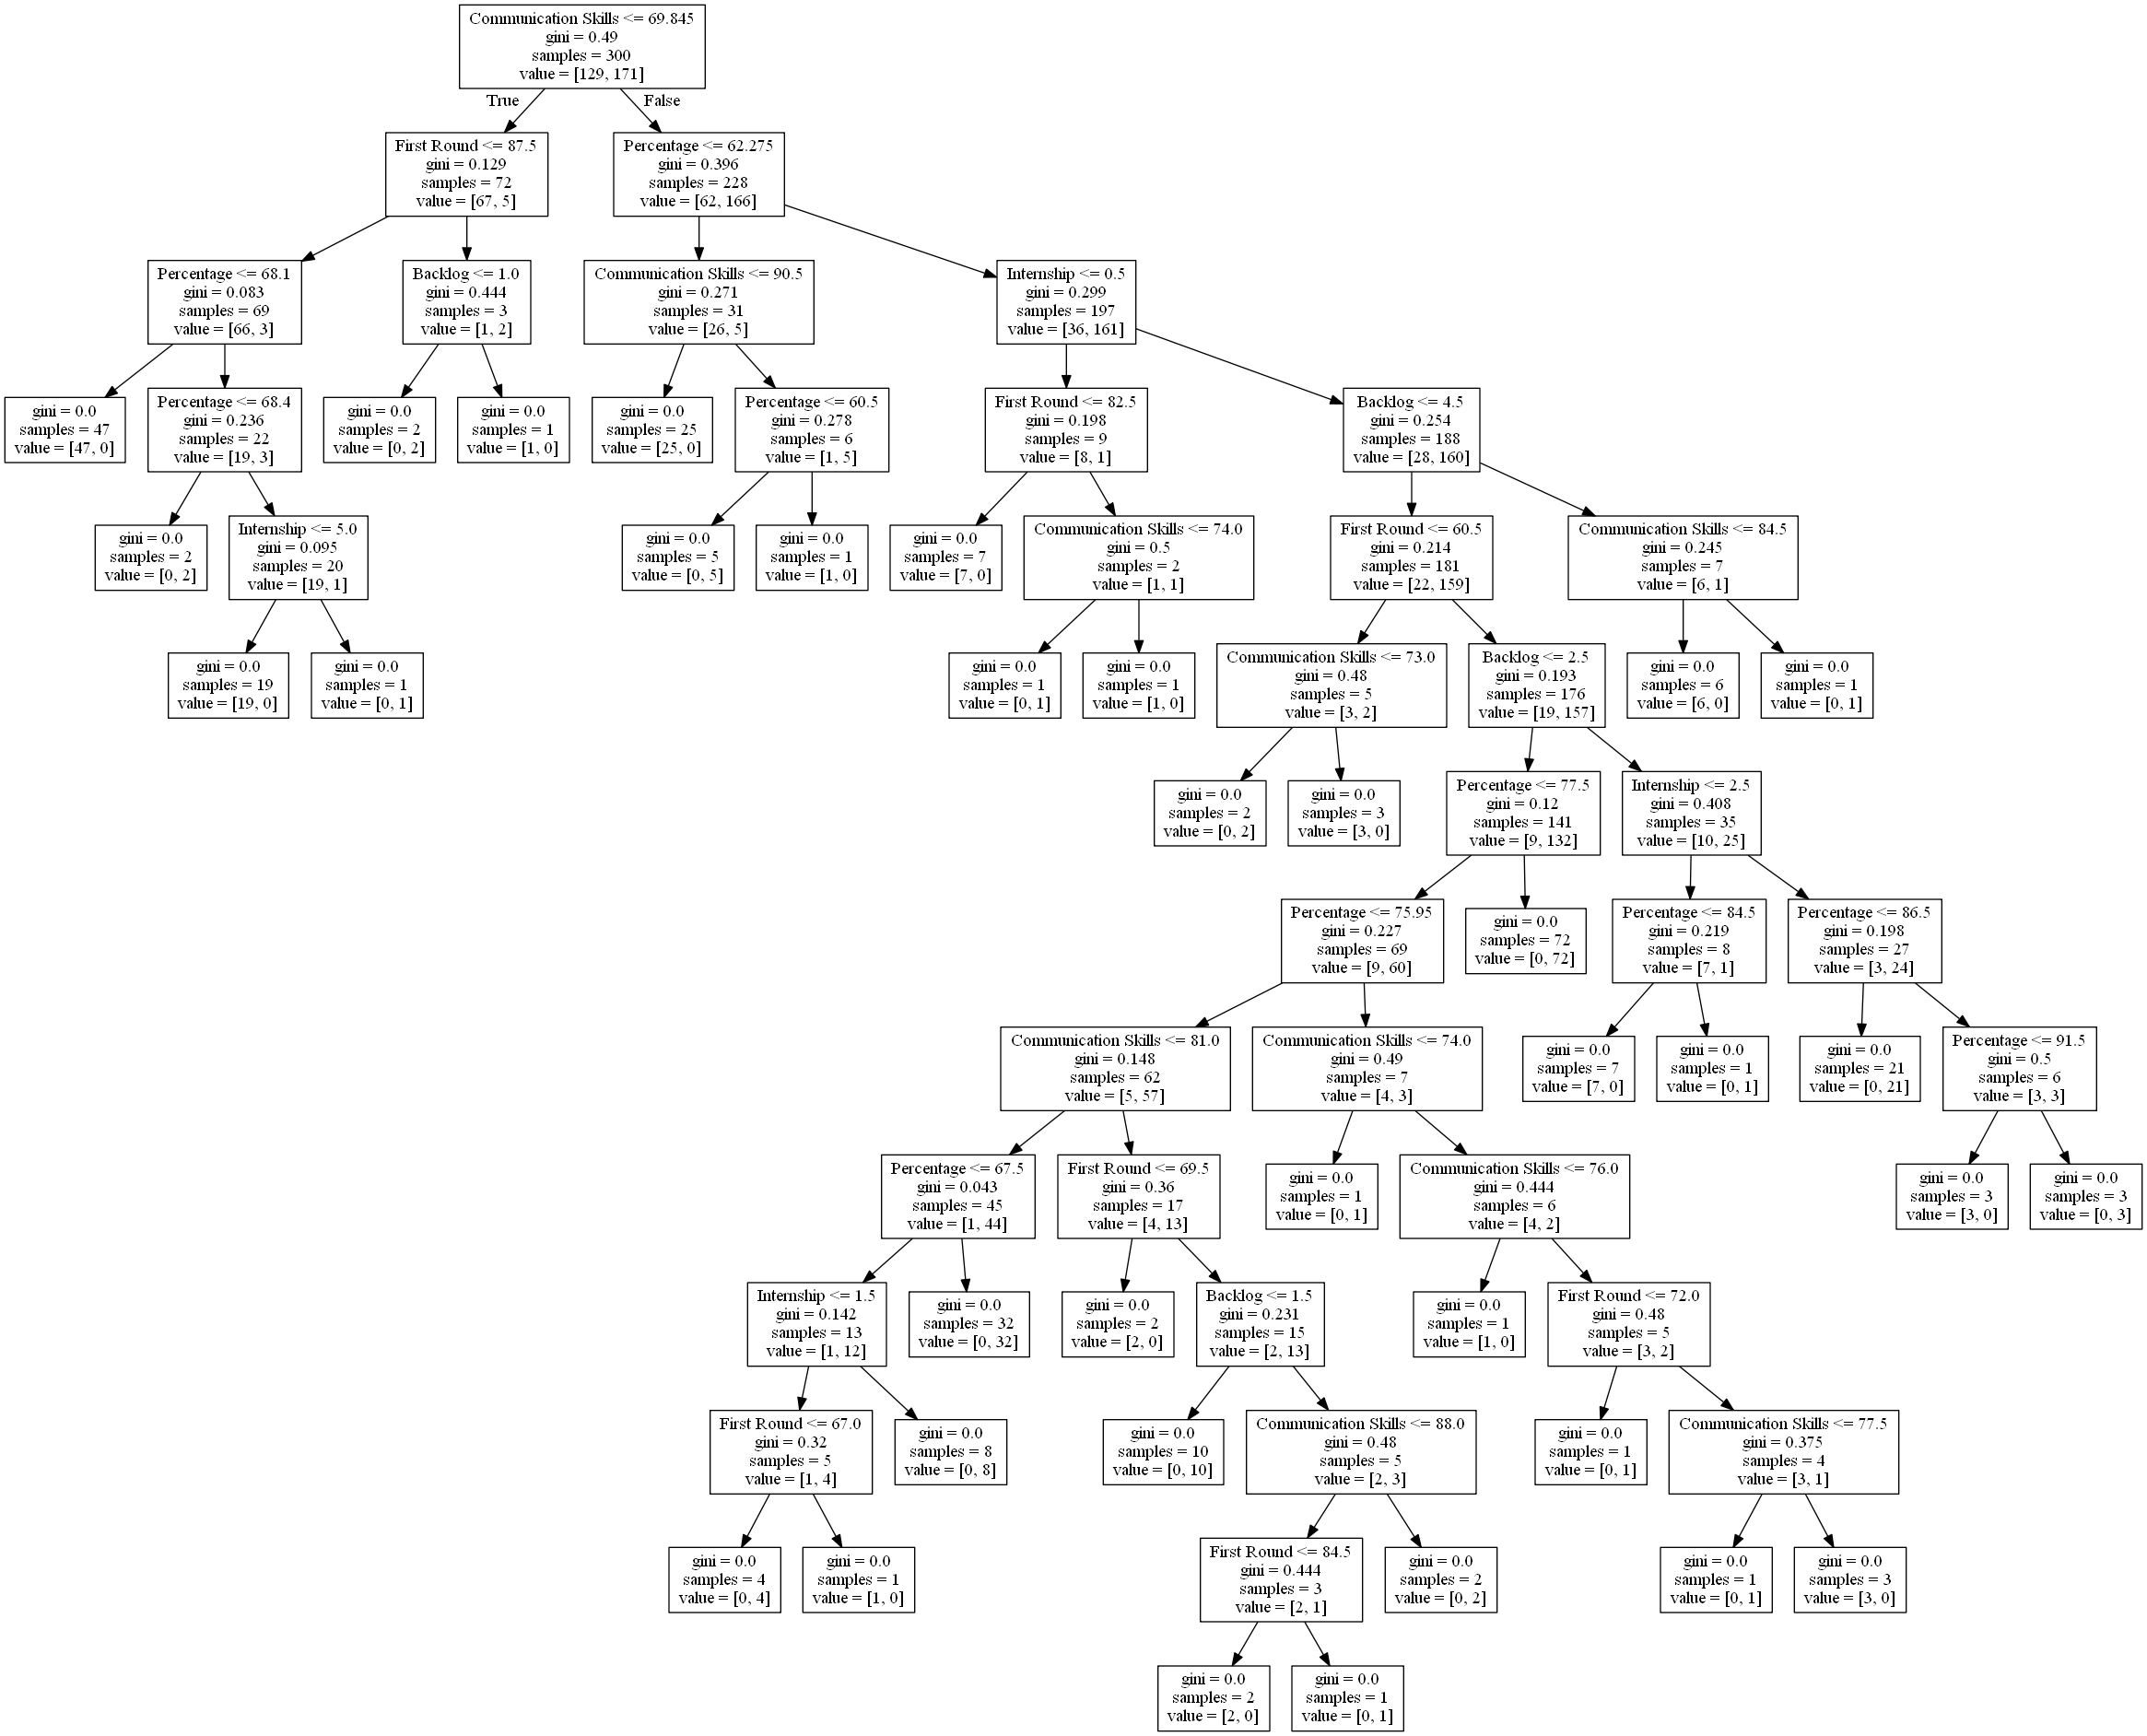

In [11]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
from sklearn import tree

dot_data = StringIO()  
tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 


In [12]:
model.predict([[65,1,3,71,70]])  # Predicting the result for random a candidate

array([1], dtype=int64)

In [13]:
df['Hire?'].value_counts()

1    216
0    159
Name: Hire?, dtype: int64

In [16]:
model.feature_importances_  # Getting the importance percentages for different features

array([0.27185123, 0.08468859, 0.12752497, 0.08057521, 0.43536001])

In [17]:
import matplotlib.pyplot as plt

plt.plot(model.feature_importances_, 'o')
plt.xticks(range(X.shape[1]),X_columns, rotation=90)
plt.ylim(0, 1)

(0, 1)

### Seeing the correlation between 'Percentage' and 'Commucivation Skills' features

Estimated coefficients:
b_0 = -0.004252231223588865            
b_1 = 1.0326172189378922


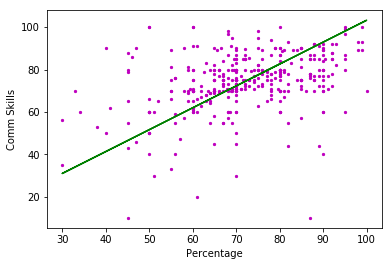

In [18]:

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x - n*m_y*m_x)
    SS_xx = np.sum(x*x - n*m_x*m_x)
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return(b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 5)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('Percentage')
    plt.ylabel('Comm Skills')
 
    # function to show plot
    plt.show()
    
    
p=np.array(list(df['Percentage']))
q=np.array(list(df['Communication Skills']))
b = estimate_coef(p, q)
print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
# plotting regression line
plot_regression_line(p, q, b)

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [20]:
from sklearn.metrics import accuracy_score
print("accuracy on test set: %f" % forest.score(X_test, y_test))
forest_predict = forest.predict(X_test)
print("Accuracy = {}.".format(accuracy_score(y_test,forest_predict)))

accuracy on test set: 0.933333
Accuracy = 0.9333333333333333.


In [21]:
forest.predict([[66,1,3,85,75]])

array([1], dtype=int64)

(0, 1)

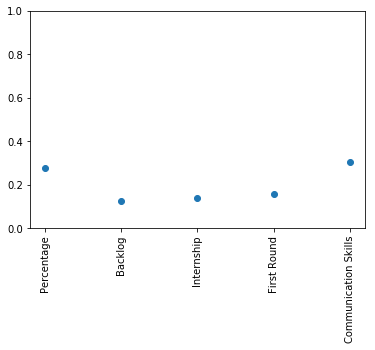

In [22]:
plt.plot(forest.feature_importances_, 'o')
plt.xticks(range(X.shape[1]),X_columns, rotation=90)
plt.ylim(0, 1)

In [23]:
data.groupby('Hire?').min()

,Percentage,Backlog,Internship,First Round,Communication Skills
Hire?,,,,,
0,30.0,0,0,20.0,10.0
1,50.0,0,0,50.0,40.0


## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logit = LogisticRegression().fit(X_train, y_train)
print("training set score: %f" % logit.score(X_train, y_train))
print("test set score: %f" % logit.score(X_test, y_test))

training set score: 0.823333
test set score: 0.840000


In [23]:
logit.predict([[66,4,3,85,75]])

array([0], dtype=int64)

In [24]:
logit.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [25]:
logit_1 = LogisticRegression(C=7).fit(X_train, y_train)
print("training set score: %f" % logit_1.score(X_train, y_train))
print("test set score: %f" % logit_1.score(X_test, y_test))

training set score: 0.840000
test set score: 0.880000


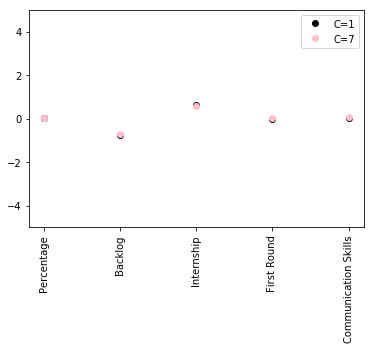

In [26]:
plt.plot(logit.coef_.T, 'o', label="C=1",color='black')
plt.plot(logit_1.coef_.T, 'o', label="C=7",color='pink')
plt.xticks(range(X_train.shape[1]), X_columns, rotation=90)
plt.ylim(-5, 5)
plt.legend()

In [27]:
print(logit_1.predict([[66,4,3,85,75]]))
print(logit_1.predict(X_test))

[0]
[1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0
 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 0]


## Support Vector Classifier

In [28]:
from sklearn.svm import SVC

In [29]:
svc = SVC(kernel="linear")
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
print(svc.coef_.shape)
print(svc.intercept_.shape)

(1, 5)
(1,)


In [31]:
svc.predict([[55,3,2,80,80]])

array([0], dtype=int64)

In [32]:
svc.score(X_test,y_test)

0.88

In [33]:
svc_2 = SVC(kernel="linear",C=10)
svc_2.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
svc_2.predict([[55,3,5,80,80]])

array([1], dtype=int64)

## Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)

GaussianNB(priors=None)

In [39]:
nb_predicted = nb_classifier.predict(X_test)
print("Accuracy = {}.".format(accuracy_score(y_test,nb_predicted)))

Accuracy = 0.9066666666666666.
